In [1]:
import pandas as pd
import numpy as np

In [3]:
feat = pd.read_csv('../data/census_cbg_with_predicted_hesitancy_vaccincation.csv')

In [4]:
print(len(feat))
pd.set_option('display.max_columns', None)
# Drop the features that are probably not going to be useful
feat = feat.drop(columns=['state', 'census_block_group_str', 'census_county', 'state_fips'])
feat = feat[feat['total_population'] > 10] # Drop CBGs with too few people
feat = feat.dropna() 
print(len(feat))
feat.head()

215196
215162


,census_block_group,total_households,M,F,age0,age1,age2,age3,age4,age5,age6,age7,age8,M0,M1,M2,M3,M4,M5,M6,M7,M8,F0,F1,F2,F3,F4,F5,F6,F7,F8,race_white,race_black,race_indian,race_asian,race_pacific,income_0,income_1,income_2,income_3,income_4,income_5,income_6,income_7,income_8,income_9,income_10,income_11,income_12,income_13,income_14,income_15,M_Ed0,M_Ed1,M_Ed2,M_Ed3,M_Ed4,M_Ed5,M_Ed6,M_Ed7,M_Ed8,M_Ed9,M_Ed10,M_Ed11,M_Ed12,M_Ed13,M_Ed14,M_Ed15,F_Ed0,F_Ed1,F_Ed2,F_Ed3,F_Ed4,F_Ed5,F_Ed6,F_Ed7,F_Ed8,F_Ed9,F_Ed10,F_Ed11,F_Ed12,F_Ed13,F_Ed14,F_Ed15,Ed0,Ed1,Ed2,Ed3,Ed4,Ed5,Ed6,Ed7,Ed8,Ed9,Ed10,Ed11,Ed12,Ed13,Ed14,Ed15,longitude,latitude,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,GA,IA,ID,IL,IN,KS,KY,LA,MA,MD,ME,MI,MN,MO,MS,MT,NC,ND,NE,NH,NJ,NM,NV,NY,OH,OK,OR,PA,RI,SC,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY,total_population,Estimated hesitant or unsure,Estimated hesitant,percent_fully_vaccinated
0,10010201001,193,0.477852,0.522148,0.179866,0.097987,0.124832,0.155705,0.116779,0.220134,0.088591,0.016107,0.000000,0.221910,0.064607,0.106742,0.154494,0.058989,0.238764,0.154494,0.000000,0.000000,0.141388,0.128535,0.141388,0.156812,0.169666,0.203085,0.028278,0.030848,0.000000,0.785235,0.214765,0.000000,0.000000,0.000000,0.088083,0.025907,0.036269,0.062176,0.139896,0.025907,0.000000,0.025907,0.000000,0.036269,0.196891,0.181347,0.031088,0.150259,0.000000,0.000000,0.000000,0.000000,0.104072,0.000000,0.239819,0.000000,0.022624,0.000000,0.357466,0.031674,0.027149,0.018100,0.149321,0.049774,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.023715,0.019763,0.043478,0.276680,0.023715,0.324111,0.043478,0.106719,0.047431,0.027668,0.063241,0.000000,0.000000,0.048523,0.000000,0.111814,0.012658,0.021097,0.023207,0.314346,0.027426,0.185654,0.031646,0.126582,0.048523,0.014768,0.033755,-86.493804,32.466536,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,745,0.273205,0.189945,21.875892
1,10010201002,390,0.505138,0.494862,0.060870,0.192095,0.118577,0.091700,0.166798,0.186561,0.119368,0.050593,0.013439,0.014085,0.244131,0.153365,0.092332,0.142410,0.178404,0.112676,0.045383,0.017214,0.108626,0.138978,0.083067,0.091054,0.191693,0.194888,0.126198,0.055911,0.009585,0.905518,0.086957,0.000000,0.007525,0.000000,0.000000,0.038462,0.035897,0.000000,0.010256,0.046154,0.048718,0.007692,0.048718,0.064103,0.130769,0.248718,0.120513,0.069231,0.120513,0.010256,0.017857,0.000000,0.000000,0.000000,0.056122,0.010204,0.017857,0.007653,0.293367,0.022959,0.132653,0.040816,0.193878,0.150510,0.045918,0.010204,0.000000,0.0,0.000000,0.000000,0.011574,0.013889,0.009259,0.013889,0.351852,0.027778,0.196759,0.041667,0.185185,0.136574,0.000000,0.011574,0.008495,0.000000,0.000000,0.000000,0.032767,0.012136,0.013350,0.010922,0.324029,0.025485,0.166262,0.041262,0.189320,0.143204,0.021845,0.010922,-86.493878,32.489012,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1265,0.226187,0.149921,25.373428
2,10010202001,244,0.556250,0.443750,0.110417,0.221875,0.093750,0.104167,0.138542,0.122917,0.093750,0.079167,0.035417,0.153558,0.303371,0.114232,0.080524,0.059925,0.168539,0.046816,0.073034,0.000000,0.056338,0.119718,0.068075,0.133803,0.237089,0.065728,0.152582,0.086854,0.079812,0.383227,0.602972,0.000000,0.000000,0.013800,0.110656,0.151639,0.086066,0.000000,0.057377,0.016393,0.016393,0.012295,0.000000,0.016393,0.114754,0.364754,0.036885,0.016393,0.000000,0.000000,0.035857,0.015936,0.000000,0.000000,0.067729,0.000000,0.091633,0.011952,0.254980,0.199203,0.163347,0.000000,0.123506,0.000000,0.035857,0.000000,0.000000,0.0,0.042735,0.017094,0.000000,0.011396,0.113960,0.000000,0.564103,0.056980,0.065527,0.042735,0.065527,0.019943,0.000000,0.000000,0.014950,0.006645,0.024917,0.009967,0.028239,0.006645,0.104651,0.004983,0.435216,0.116279,0.106312,0.024917,0.089701,0.011628,0.014950,0.000000,-86.474237,32.479703,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,960,0.

In [5]:
# from matplotlib import pyplot as plt
# for i in range(8):
#     feat['age%d' % i].hist(bins=20)
#     plt.show()

In [6]:
feat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215162 entries, 0 to 215195
Columns: 156 entries, census_block_group to percent_fully_vaccinated
dtypes: float64(103), int64(53)
memory usage: 257.7 MB


3282


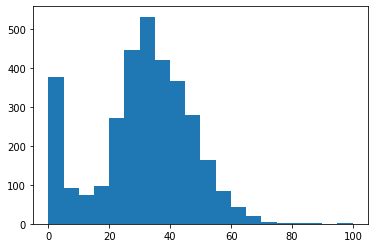

In [11]:
vac = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_County.csv')
vac_date = '07/01/2021'
from matplotlib import pyplot as plt
vac = vac[vac['Date'] == vac_date]    
print(len(vac))
numbers = vac['Series_Complete_Pop_Pct'].to_numpy()
plt.hist(numbers, bins=20)
plt.show()

In [12]:
print(len(vac))
vac = vac[vac['FIPS'].apply(pd.to_numeric, errors='coerce').notna()].dropna()   # Remove any unusual FIPS that cannot be converted to a number
vac = vac[vac['Series_Complete_Pop_Pct'] > 2.0]   # All counties should have vac rate > 2% now, anything less should be corrupted 
vac = vac.drop(['Series_Complete_12Plus', 'Series_Complete_12PlusPop_Pct', 'Series_Complete_18Plus', 'Series_Complete_65Plus', 'Series_Complete_Yes',
                'Administered_Dose1_Recip', 'Administered_Dose1_Pop_Pct', 'Administered_Dose1_Recip_12Plus', 'Administered_Dose1_Recip_12PlusPop_Pct', 
                'Administered_Dose1_Recip_18Plus', 'Administered_Dose1_Recip_18PlusPop_Pct', 'Administered_Dose1_Recip_65Plus', 'Administered_Dose1_Recip_65PlusPop_Pct'], axis=1)
vac = vac.set_index('FIPS')
print(len(vac))

3282
2931


In [13]:
vac.head()

,Date,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct,Completeness_pct
FIPS,,,,,,,,
18069,07/01/2021,26,Huntington County,IN,38.8,48.4,88.3,98.5
10003,07/01/2021,26,New Castle County,DE,50.2,60.4,80.8,96.1
36075,07/01/2021,26,Oswego County,NY,46.6,56.2,79.1,97.4
47163,07/01/2021,26,Sullivan County,TN,39.9,48.2,73.7,97.8
41043,07/01/2021,26,Linn County,OR,41.9,51.7,75.3,97.7


In [15]:
texas_counties_df = pd.read_csv('../data/COVID-19_Vaccinations_in_the_United_States_County.csv',
                                dtype={'FIPS': object}, parse_dates=['Date'])
texas_counties_df = texas_counties_df.loc[texas_counties_df['Recip_State']=='TX']
texas_counties_df = texas_counties_df.loc[texas_counties_df['Date'] == vac_date]
# drop bad counties
texas_counties_df = texas_counties_df.loc[texas_counties_df['FIPS'] != 'UNK']
print('Shape of Texas counties df: {}'.format(texas_counties_df.shape))

# generate county populations so we can compute percentage of vaccination
texas_pop_df = pd.read_csv('../data/cc-est2019-agesex-48.csv')
# get the latest estimates of population (YEAR=12 correspondint to 7/1/2019 population estimate)
texas_pop_df = texas_pop_df.loc[texas_pop_df['YEAR']==12]
texas_pop_df = texas_pop_df[['CTYNAME', 'POPESTIMATE', 'AGE16PLUS_TOT', 'AGE65PLUS_TOT']]
texas_pop_df = texas_pop_df.rename({'CTYNAME': 'Recip_County', 'POPESTIMATE': 'total_population',
                                    'AGE16PLUS_TOT': '16older_population', 'AGE65PLUS_TOT': '65older_population',
                                   }, axis=1)


Shape of Texas counties df: (254, 22)


In [16]:
# Get texas data
texas_vaccine_df = pd.read_excel('../data/texas-07-01-2021.xlsx', sheet_name='By County, Age')
# print(texas_vaccine_df.head())
texas_vaccine_df = texas_vaccine_df.drop('Doses Administered', axis=1)
texas_vaccine_df = texas_vaccine_df.rename({'County Name ': 'Recip_County',
                                            'Age Group': 'age_group',
                                            'People Vaccinated with at least One Dose': 'one_dose',
                                            'People Fully Vaccinated ': 'fully_vaccinated'}, axis=1)
texas_vaccine_df['Recip_County'] =  texas_vaccine_df['Recip_County'] + ' County'
texas_vaccine_df = texas_vaccine_df.pivot_table(index=['Recip_County'], columns='age_group',
                                                values=['one_dose', 'fully_vaccinated'])
texas_vaccine_df.columns = ['_'.join(col) for col in texas_vaccine_df.columns.values]
texas_vaccine_df = texas_vaccine_df.drop(['fully_vaccinated_Total',
                                          'one_dose_16-49 years', 'one_dose_50-64 years',
                                          'one_dose_65-79 years', 'one_dose_80+ years',
                                          'one_dose_Total', 'one_dose_Unknown'], axis=1)

texas_vaccine_df['fully_vaccinated_Unknown'] = texas_vaccine_df['fully_vaccinated_Unknown'].fillna(0)
texas_vaccine_df = texas_vaccine_df.drop(['Grand Total County', 'Other County'], axis=0)
texas_vaccine_df['fully_vaccinated'] = (texas_vaccine_df['fully_vaccinated_16-49 years'] +
                                        texas_vaccine_df['fully_vaccinated_50-64 years'] +
                                        texas_vaccine_df['fully_vaccinated_65-79 years'] +
                                        texas_vaccine_df['fully_vaccinated_80+ years'] +
                                        texas_vaccine_df['fully_vaccinated_Unknown'])
texas_vaccine_df['fully_vaccinated_16older'] = (texas_vaccine_df['fully_vaccinated_16-49 years'] +
                                                texas_vaccine_df['fully_vaccinated_50-64 years'] +
                                                texas_vaccine_df['fully_vaccinated_65-79 years'] +
                                                texas_vaccine_df['fully_vaccinated_80+ years'])
texas_vaccine_df['fully_vaccinated_65older'] = (texas_vaccine_df['fully_vaccinated_65-79 years'] +
                                                texas_vaccine_df['fully_vaccinated_80+ years'])
print('Original shape of texas vaccines data: {}'.format(texas_vaccine_df.shape))
texas_vaccine_df = texas_vaccine_df.reset_index().merge(texas_counties_df,
                                                        left_on='Recip_County', right_on='Recip_County',
                                                        how='inner').set_index('Recip_County')
print('Shape of texas vaccines data after joinging with CDC texas counties: {}'.format(texas_vaccine_df.shape))

texas_vaccine_df = texas_vaccine_df.merge(texas_pop_df, left_index=True, right_on='Recip_County', how='inner')
print('Shape of texas vaccines data after joinging with census pouplations: {}'.format(texas_vaccine_df.shape))

# Prepare Texas data so it looks exactly like the CDC data for other states
texas_vaccine_df['Date'] = vac_date
texas_vaccine_df['Recip_State'] = 'TX'
texas_vaccine_df['Completeness_pct'] = 100.0
texas_vaccine_df['Series_Complete_Pop_Pct'] = (texas_vaccine_df['fully_vaccinated'] * 100.0 /
                                                texas_vaccine_df['total_population'])
# texas has no data on 12 years old, so we set the column to NULL to at least have same columns as CDC
# Texas does not have vaccination for 18 years or older but CDC data does, so for sake of consistency between 
# two datasets we use fraction of 16 years or older in Texas as 18 years or older
texas_vaccine_df['Series_Complete_18PlusPop_Pct'] = (texas_vaccine_df['fully_vaccinated_16older'] * 100.0 /
                                                        texas_vaccine_df['16older_population'])
texas_vaccine_df['Series_Complete_65PlusPop_Pct'] = (texas_vaccine_df['fully_vaccinated_65older'] * 100.0 /
                                                        texas_vaccine_df['65older_population'])
texas_vaccine_df = texas_vaccine_df.set_index('FIPS')
texas_vaccine_df = texas_vaccine_df[['Date', 'Recip_County', 'Recip_State', 'Completeness_pct', 'Series_Complete_Pop_Pct',
                                     'Series_Complete_18PlusPop_Pct',
                                     'Series_Complete_65PlusPop_Pct']]

texas_vaccine_df

Original shape of texas vaccines data: (254, 10)
Shape of texas vaccines data after joinging with CDC texas counties: (254, 31)
Shape of texas vaccines data after joinging with census pouplations: (254, 35)


,Date,Recip_County,Recip_State,Completeness_pct,Series_Complete_Pop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct
FIPS,,,,,,,
48001,07/01/2021,Anderson County,TX,100.0,27.371612,32.892080,54.169554
48003,07/01/2021,Andrews County,TX,100.0,29.649826,41.072354,72.831424
48005,07/01/2021,Angelina County,TX,100.0,29.487401,38.126342,66.474830
48007,07/01/2021,Aransas County,TX,100.0,43.857933,52.057769,75.835665
48009,07/01/2021,Archer County,TX,100.0,35.087104,43.360786,70.005963
...,...,...,...,...,...,...,...
48499,07/01/2021,Wood County,TX,100.0,31.182064,37.358242,63.311248
48501,07/01/2021,Yoakum County,TX,100.0,28.210720,40.065200,66.602130
48503,07/01/2021,Young County,TX,100.0,28.267629,35.804206,60.757817


In [17]:
print('Shape of county vaccine data before append: {}'.format(vac.shape))
vac = vac.append(texas_vaccine_df, verify_integrity=True)
print('Shape of county vaccine data after append: {}'.format(vac.shape))

Shape of county vaccine data before append: (2931, 8)
Shape of county vaccine data after append: (3185, 8)


In [18]:
vac.head()

,Date,MMWR_week,Recip_County,Recip_State,Series_Complete_Pop_Pct,Series_Complete_18PlusPop_Pct,Series_Complete_65PlusPop_Pct,Completeness_pct
FIPS,,,,,,,,
18069,07/01/2021,26.0,Huntington County,IN,38.8,48.4,88.3,98.5
10003,07/01/2021,26.0,New Castle County,DE,50.2,60.4,80.8,96.1
36075,07/01/2021,26.0,Oswego County,NY,46.6,56.2,79.1,97.4
47163,07/01/2021,26.0,Sullivan County,TN,39.9,48.2,73.7,97.8
41043,07/01/2021,26.0,Linn County,OR,41.9,51.7,75.3,97.7


In [19]:
features = {}  # Predictive features
labels = {}    # Vaccination rate of counties
cbg = {}       # The CBGs in a county, used to map the data back into a pandas table later on 
num_zero = 0
for fips in list(vac.index.values):  # enumerate all fips, which are currently the indices
    subset = feat[(feat['census_block_group'].astype(int) // 10000000) == int(fips)]
    if len(subset) == 0:
        num_zero += 1
        continue
    features[fips] = subset.to_numpy()[:, 3:-3]   # Get the array of input features for all CBGs in a county
    # vac_subset =    
    labels[fips] = vac['Series_Complete_Pop_Pct'][fips] / vac['Completeness_pct'][fips] * 100   # Infer the missing data by assuming that the missing population have same vac rate
    cbg[fips] = subset['census_block_group']      # Take out the CBG entry   
    assert not np.isnan(features[fips].sum())
    assert not np.isnan(labels[fips])
print(num_zero)

80


In [17]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.optim import lr_scheduler

device = torch.device('cuda:0')

In [18]:
# Convert everything to pytorch tensors once and for all
weights = {}
for key in features:
    features[key] = torch.tensor(features[key], device=device, dtype=torch.float32)
    labels[key] = torch.tensor(labels[key], device=device, dtype=torch.float32)
    weights[key] = features[key][:, -1] / features[key][:, -1].sum()   # Weighting by population
    
    features[key][:, -1] = features[key][:, -1].log() 

In [19]:
# Do a training validation split for cross validation, for evaluating performance call this cell; for getting final results call the next cell
keys = list(features.keys())
np.random.seed(0)
np.random.shuffle(keys)

train_len = int(len(keys) * 0.9)
train_features = {key: features[key] for key in keys[:train_len]}
train_labels = {key: labels[key] for key in keys[:train_len]}
train_weights = {key: weights[key] for key in keys[:train_len]}
train_cbg = {key: cbg[key] for key in keys[:train_len]}

test_features = {key: features[key] for key in keys[train_len:]}
test_labels = {key: labels[key] for key in keys[train_len:]}
test_weights = {key: weights[key] for key in keys[train_len:]}
test_cbg = {key: cbg[key] for key in keys[train_len:]}


In [20]:

class NetworkFC(nn.Module):
    def __init__(self, x_dim, out_dim=1, num_feat=20):
        super(NetworkFC, self).__init__()
        self.fc1 = nn.Linear(x_dim, num_feat)
        self.fc2 = nn.Linear(num_feat, num_feat)
        self.drop = nn.Dropout(p=0.5)
        self.fc3 = nn.Linear(num_feat, out_dim)
        
    def forward(self, x):
        x = F.leaky_relu(self.fc1(x))
        x = F.leaky_relu(self.fc2(x))
        x = self.drop(x)
        out = self.fc3(x)
        return torch.sigmoid(out) * 100


Epoch 0, train_loss=0.0945, reg=0.0000, test_loss=0.0806, time=13.51
Epoch 1, train_loss=0.0806, reg=0.0000, test_loss=0.0829, time=25.82
Epoch 2, train_loss=0.0799, reg=0.0000, test_loss=0.0796, time=38.81
Epoch 3, train_loss=0.0794, reg=0.0000, test_loss=0.0816, time=50.39
Epoch 4, train_loss=0.0744, reg=0.0000, test_loss=0.0788, time=63.64
Epoch 5, train_loss=0.0725, reg=0.0000, test_loss=0.0770, time=76.94
Epoch 6, train_loss=0.0718, reg=0.0000, test_loss=0.0748, time=90.25
Epoch 7, train_loss=0.0715, reg=0.0000, test_loss=0.0683, time=103.26
Epoch 8, train_loss=0.0729, reg=0.0000, test_loss=0.0730, time=116.59
Epoch 9, train_loss=0.0696, reg=0.0000, test_loss=0.0678, time=129.66


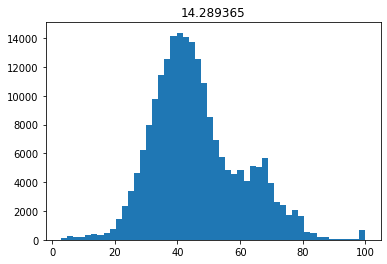

Epoch 10, train_loss=0.0710, reg=0.0000, test_loss=0.0716, time=145.74
Epoch 11, train_loss=0.0692, reg=0.0000, test_loss=0.0665, time=158.77
Epoch 12, train_loss=0.0682, reg=0.0000, test_loss=0.0667, time=171.73
Epoch 13, train_loss=0.0690, reg=0.0000, test_loss=0.0658, time=184.88
Epoch 14, train_loss=0.0683, reg=0.0000, test_loss=0.0665, time=197.88
Epoch 15, train_loss=0.0686, reg=0.0000, test_loss=0.0665, time=210.98
Epoch 16, train_loss=0.0700, reg=0.0000, test_loss=0.0857, time=224.64
Epoch 17, train_loss=0.0759, reg=0.0000, test_loss=0.0685, time=238.23
Epoch 18, train_loss=0.0701, reg=0.0000, test_loss=0.0642, time=251.84
Epoch 19, train_loss=0.0675, reg=0.0000, test_loss=0.0617, time=264.92


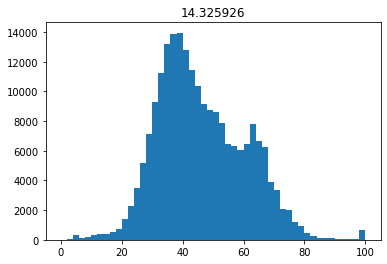

Epoch 20, train_loss=0.0658, reg=0.0000, test_loss=0.0634, time=279.23
Epoch 21, train_loss=0.0659, reg=0.0000, test_loss=0.0627, time=292.63
Epoch 22, train_loss=0.0647, reg=0.0000, test_loss=0.0622, time=306.32
Epoch 23, train_loss=0.0649, reg=0.0000, test_loss=0.0627, time=319.94
Epoch 24, train_loss=0.0642, reg=0.0000, test_loss=0.0622, time=332.97
Epoch 25, train_loss=0.0634, reg=0.0000, test_loss=0.0614, time=344.89
Epoch 26, train_loss=0.0641, reg=0.0000, test_loss=0.0624, time=358.04
Epoch 27, train_loss=0.0636, reg=0.0000, test_loss=0.0624, time=371.26
Epoch 28, train_loss=0.0640, reg=0.0000, test_loss=0.0612, time=384.27
Epoch 29, train_loss=0.0638, reg=0.0000, test_loss=0.0604, time=397.61


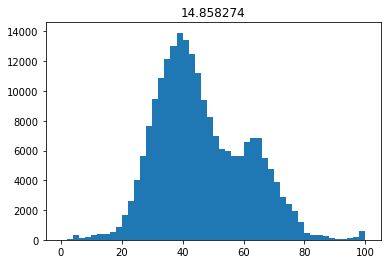

Epoch 30, train_loss=0.0635, reg=0.0000, test_loss=0.0632, time=413.95
Epoch 31, train_loss=0.0636, reg=0.0000, test_loss=0.0618, time=427.28
Epoch 32, train_loss=0.0634, reg=0.0000, test_loss=0.0645, time=440.43
Epoch 33, train_loss=0.0644, reg=0.0000, test_loss=0.0600, time=453.84
Epoch 34, train_loss=0.0629, reg=0.0000, test_loss=0.0609, time=467.09
Epoch 35, train_loss=0.0631, reg=0.0000, test_loss=0.0618, time=480.14
Epoch 36, train_loss=0.0631, reg=0.0000, test_loss=0.0600, time=493.23
Epoch 37, train_loss=0.0627, reg=0.0000, test_loss=0.0607, time=506.45
Epoch 38, train_loss=0.0631, reg=0.0000, test_loss=0.0604, time=519.68
Epoch 39, train_loss=0.0628, reg=0.0000, test_loss=0.0611, time=532.65


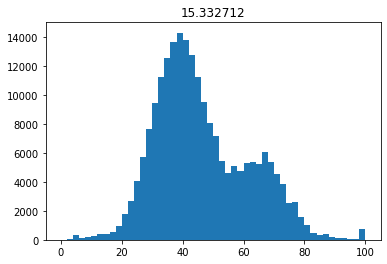

Epoch 40, train_loss=0.0622, reg=0.0000, test_loss=0.0562, time=548.42
Epoch 41, train_loss=0.0611, reg=0.0000, test_loss=0.0562, time=560.25
Epoch 42, train_loss=0.0608, reg=0.0000, test_loss=0.0561, time=573.41
Epoch 43, train_loss=0.0609, reg=0.0000, test_loss=0.0566, time=586.70
Epoch 44, train_loss=0.0611, reg=0.0000, test_loss=0.0561, time=599.84
Epoch 45, train_loss=0.0609, reg=0.0000, test_loss=0.0568, time=613.11
Epoch 46, train_loss=0.0609, reg=0.0000, test_loss=0.0562, time=626.34
Epoch 47, train_loss=0.0605, reg=0.0000, test_loss=0.0561, time=639.66
Epoch 48, train_loss=0.0602, reg=0.0000, test_loss=0.0561, time=652.83
Epoch 49, train_loss=0.0609, reg=0.0000, test_loss=0.0564, time=665.95


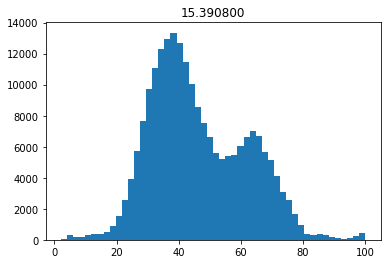

Epoch 50, train_loss=0.0606, reg=0.0000, test_loss=0.0562, time=679.58
Epoch 51, train_loss=0.0605, reg=0.0000, test_loss=0.0563, time=692.82
Epoch 52, train_loss=0.0601, reg=0.0000, test_loss=0.0566, time=705.84
Epoch 53, train_loss=0.0605, reg=0.0000, test_loss=0.0568, time=719.21
Epoch 54, train_loss=0.0602, reg=0.0000, test_loss=0.0568, time=732.12
Epoch 55, train_loss=0.0602, reg=0.0000, test_loss=0.0564, time=743.91
Epoch 56, train_loss=0.0603, reg=0.0000, test_loss=0.0581, time=755.83
Epoch 57, train_loss=0.0605, reg=0.0000, test_loss=0.0568, time=765.15
Epoch 58, train_loss=0.0603, reg=0.0000, test_loss=0.0558, time=776.13
Epoch 59, train_loss=0.0601, reg=0.0000, test_loss=0.0561, time=789.57


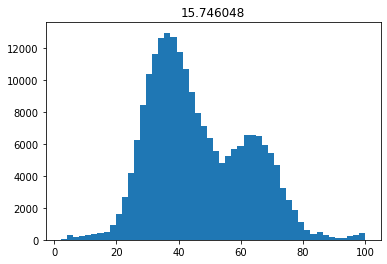

Epoch 60, train_loss=0.0594, reg=0.0000, test_loss=0.0549, time=805.29
Epoch 61, train_loss=0.0590, reg=0.0000, test_loss=0.0546, time=817.59
Epoch 62, train_loss=0.0592, reg=0.0000, test_loss=0.0546, time=830.67
Epoch 63, train_loss=0.0592, reg=0.0000, test_loss=0.0546, time=842.33
Epoch 64, train_loss=0.0589, reg=0.0000, test_loss=0.0547, time=854.74
Epoch 65, train_loss=0.0588, reg=0.0000, test_loss=0.0546, time=867.20
Epoch 66, train_loss=0.0586, reg=0.0000, test_loss=0.0544, time=880.33
Epoch 67, train_loss=0.0588, reg=0.0000, test_loss=0.0543, time=892.56
Epoch 68, train_loss=0.0589, reg=0.0000, test_loss=0.0554, time=904.41
Epoch 69, train_loss=0.0587, reg=0.0000, test_loss=0.0560, time=917.35


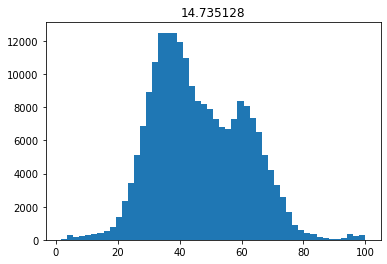

Epoch 70, train_loss=0.0591, reg=0.0000, test_loss=0.0549, time=933.43
Epoch 71, train_loss=0.0586, reg=0.0000, test_loss=0.0543, time=945.88
Epoch 72, train_loss=0.0586, reg=0.0000, test_loss=0.0548, time=958.08
Epoch 73, train_loss=0.0587, reg=0.0000, test_loss=0.0543, time=970.57
Epoch 74, train_loss=0.0588, reg=0.0000, test_loss=0.0556, time=983.56
Epoch 75, train_loss=0.0590, reg=0.0000, test_loss=0.0548, time=996.81
Epoch 76, train_loss=0.0588, reg=0.0000, test_loss=0.0543, time=1010.09
Epoch 77, train_loss=0.0585, reg=0.0000, test_loss=0.0552, time=1023.40
Epoch 78, train_loss=0.0586, reg=0.0000, test_loss=0.0548, time=1036.55
Epoch 79, train_loss=0.0583, reg=0.0000, test_loss=0.0549, time=1049.58


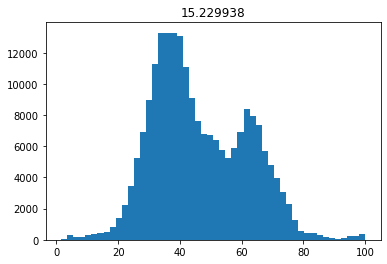

Epoch 80, train_loss=0.0582, reg=0.0000, test_loss=0.0533, time=1065.75
Epoch 81, train_loss=0.0582, reg=0.0000, test_loss=0.0537, time=1078.92
Epoch 82, train_loss=0.0580, reg=0.0000, test_loss=0.0538, time=1092.04
Epoch 83, train_loss=0.0575, reg=0.0000, test_loss=0.0533, time=1105.03
Epoch 84, train_loss=0.0577, reg=0.0000, test_loss=0.0536, time=1118.18
Epoch 85, train_loss=0.0576, reg=0.0000, test_loss=0.0532, time=1131.31
Epoch 86, train_loss=0.0575, reg=0.0000, test_loss=0.0533, time=1144.52
Epoch 87, train_loss=0.0575, reg=0.0000, test_loss=0.0531, time=1157.55
Epoch 88, train_loss=0.0574, reg=0.0000, test_loss=0.0532, time=1170.76
Epoch 89, train_loss=0.0574, reg=0.0000, test_loss=0.0532, time=1183.94


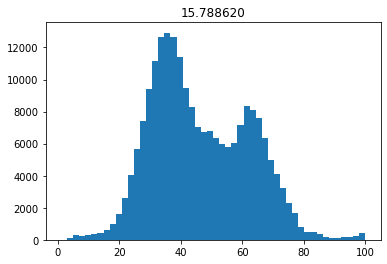

Epoch 90, train_loss=0.0573, reg=0.0000, test_loss=0.0532, time=1200.17
Epoch 91, train_loss=0.0578, reg=0.0000, test_loss=0.0536, time=1213.51
Epoch 92, train_loss=0.0577, reg=0.0000, test_loss=0.0533, time=1226.31
Epoch 93, train_loss=0.0572, reg=0.0000, test_loss=0.0531, time=1239.41
Epoch 94, train_loss=0.0571, reg=0.0000, test_loss=0.0535, time=1252.54
Epoch 95, train_loss=0.0571, reg=0.0000, test_loss=0.0539, time=1265.66
Epoch 96, train_loss=0.0572, reg=0.0000, test_loss=0.0532, time=1278.71
Epoch 97, train_loss=0.0572, reg=0.0000, test_loss=0.0533, time=1291.82
Epoch 98, train_loss=0.0573, reg=0.0000, test_loss=0.0532, time=1305.00
Epoch 99, train_loss=0.0571, reg=0.0000, test_loss=0.0536, time=1318.36


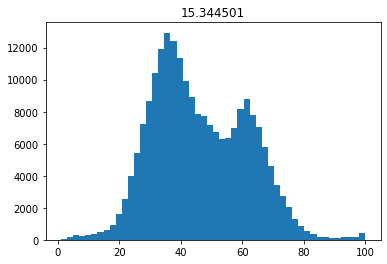

Epoch 100, train_loss=0.0569, reg=0.0000, test_loss=0.0528, time=1334.13
Epoch 101, train_loss=0.0567, reg=0.0000, test_loss=0.0528, time=1347.39
Epoch 102, train_loss=0.0567, reg=0.0000, test_loss=0.0528, time=1360.53
Epoch 103, train_loss=0.0569, reg=0.0000, test_loss=0.0528, time=1373.56
Epoch 104, train_loss=0.0567, reg=0.0000, test_loss=0.0530, time=1386.53
Epoch 105, train_loss=0.0568, reg=0.0000, test_loss=0.0527, time=1399.56
Epoch 106, train_loss=0.0565, reg=0.0000, test_loss=0.0528, time=1412.33
Epoch 107, train_loss=0.0565, reg=0.0000, test_loss=0.0529, time=1425.32
Epoch 108, train_loss=0.0566, reg=0.0000, test_loss=0.0527, time=1437.39
Epoch 109, train_loss=0.0562, reg=0.0000, test_loss=0.0528, time=1450.56


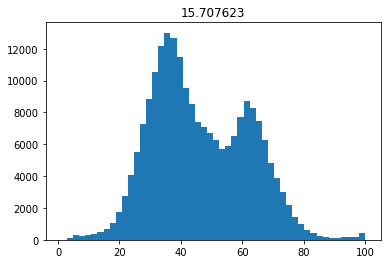

Epoch 110, train_loss=0.0566, reg=0.0000, test_loss=0.0530, time=1466.89
Epoch 111, train_loss=0.0566, reg=0.0000, test_loss=0.0530, time=1479.99
Epoch 112, train_loss=0.0565, reg=0.0000, test_loss=0.0527, time=1492.72
Epoch 113, train_loss=0.0564, reg=0.0000, test_loss=0.0528, time=1505.42
Epoch 114, train_loss=0.0561, reg=0.0000, test_loss=0.0528, time=1518.08
Epoch 115, train_loss=0.0561, reg=0.0000, test_loss=0.0531, time=1530.80
Epoch 116, train_loss=0.0562, reg=0.0000, test_loss=0.0526, time=1543.52
Epoch 117, train_loss=0.0565, reg=0.0000, test_loss=0.0529, time=1556.19
Epoch 118, train_loss=0.0560, reg=0.0000, test_loss=0.0527, time=1568.94
Epoch 119, train_loss=0.0562, reg=0.0000, test_loss=0.0525, time=1581.65


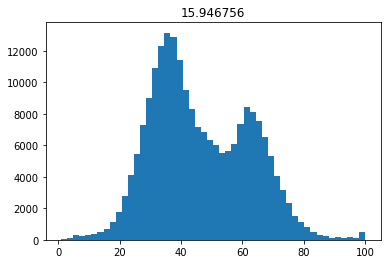

Epoch 120, train_loss=0.0562, reg=0.0000, test_loss=0.0526, time=1597.47
Epoch 121, train_loss=0.0559, reg=0.0000, test_loss=0.0526, time=1610.17
Epoch 122, train_loss=0.0560, reg=0.0000, test_loss=0.0530, time=1622.86
Epoch 123, train_loss=0.0563, reg=0.0000, test_loss=0.0525, time=1635.59
Epoch 124, train_loss=0.0559, reg=0.0000, test_loss=0.0526, time=1646.96
Epoch 125, train_loss=0.0563, reg=0.0000, test_loss=0.0526, time=1659.67
Epoch 126, train_loss=0.0559, reg=0.0000, test_loss=0.0526, time=1672.31
Epoch 127, train_loss=0.0561, reg=0.0000, test_loss=0.0525, time=1685.40
Epoch 128, train_loss=0.0561, reg=0.0000, test_loss=0.0527, time=1698.56
Epoch 129, train_loss=0.0557, reg=0.0000, test_loss=0.0525, time=1711.61


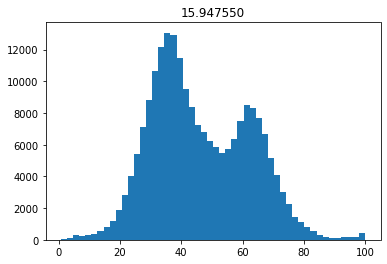

Epoch 130, train_loss=0.0559, reg=0.0000, test_loss=0.0524, time=1727.59
Epoch 131, train_loss=0.0560, reg=0.0000, test_loss=0.0526, time=1740.64
Epoch 132, train_loss=0.0560, reg=0.0000, test_loss=0.0526, time=1753.98
Epoch 133, train_loss=0.0561, reg=0.0000, test_loss=0.0524, time=1766.85
Epoch 134, train_loss=0.0560, reg=0.0000, test_loss=0.0527, time=1780.07
Epoch 135, train_loss=0.0559, reg=0.0000, test_loss=0.0526, time=1792.44
Epoch 136, train_loss=0.0558, reg=0.0000, test_loss=0.0524, time=1804.51
Epoch 137, train_loss=0.0557, reg=0.0000, test_loss=0.0525, time=1817.64
Epoch 138, train_loss=0.0557, reg=0.0000, test_loss=0.0524, time=1830.70
Epoch 139, train_loss=0.0559, reg=0.0000, test_loss=0.0527, time=1843.86


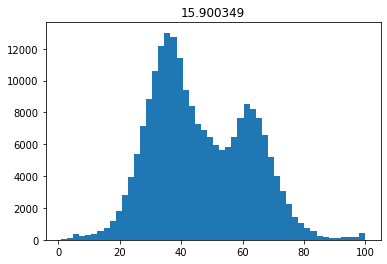

Epoch 140, train_loss=0.0560, reg=0.0000, test_loss=0.0525, time=1859.96
Epoch 141, train_loss=0.0559, reg=0.0000, test_loss=0.0525, time=1873.22
Epoch 142, train_loss=0.0559, reg=0.0000, test_loss=0.0525, time=1886.35
Epoch 143, train_loss=0.0558, reg=0.0000, test_loss=0.0525, time=1899.55
Epoch 144, train_loss=0.0560, reg=0.0000, test_loss=0.0523, time=1912.66
Epoch 145, train_loss=0.0558, reg=0.0000, test_loss=0.0524, time=1925.78
Epoch 146, train_loss=0.0558, reg=0.0000, test_loss=0.0523, time=1938.78
Epoch 147, train_loss=0.0559, reg=0.0000, test_loss=0.0525, time=1951.91
Epoch 148, train_loss=0.0558, reg=0.0000, test_loss=0.0525, time=1965.10
Epoch 149, train_loss=0.0555, reg=0.0000, test_loss=0.0526, time=1978.35


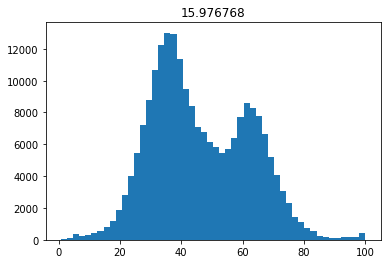

Epoch 150, train_loss=0.0556, reg=0.0000, test_loss=0.0525, time=1994.63
Epoch 151, train_loss=0.0558, reg=0.0000, test_loss=0.0525, time=2007.89
Epoch 152, train_loss=0.0560, reg=0.0000, test_loss=0.0525, time=2021.15
Epoch 153, train_loss=0.0558, reg=0.0000, test_loss=0.0525, time=2034.33
Epoch 154, train_loss=0.0559, reg=0.0000, test_loss=0.0525, time=2047.51
Epoch 155, train_loss=0.0558, reg=0.0000, test_loss=0.0525, time=2060.72
Epoch 156, train_loss=0.0556, reg=0.0000, test_loss=0.0524, time=2073.92
Epoch 157, train_loss=0.0558, reg=0.0000, test_loss=0.0525, time=2087.04
Epoch 158, train_loss=0.0557, reg=0.0000, test_loss=0.0526, time=2100.21
Epoch 159, train_loss=0.0556, reg=0.0000, test_loss=0.0525, time=2113.19


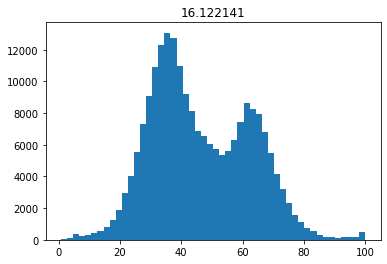

Epoch 160, train_loss=0.0557, reg=0.0000, test_loss=0.0525, time=2129.53
Epoch 161, train_loss=0.0555, reg=0.0000, test_loss=0.0524, time=2142.85
Epoch 162, train_loss=0.0555, reg=0.0000, test_loss=0.0524, time=2156.06
Epoch 163, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2169.42
Epoch 164, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2182.63
Epoch 165, train_loss=0.0555, reg=0.0000, test_loss=0.0524, time=2195.98
Epoch 166, train_loss=0.0558, reg=0.0000, test_loss=0.0523, time=2209.10
Epoch 167, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2222.18
Epoch 168, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2235.15
Epoch 169, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=2248.35


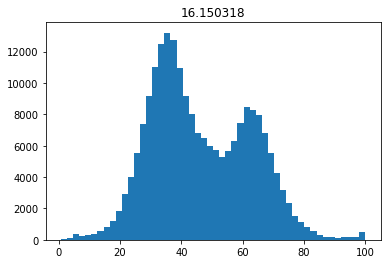

Epoch 170, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=2264.45
Epoch 171, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2277.87
Epoch 172, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=2290.96
Epoch 173, train_loss=0.0558, reg=0.0000, test_loss=0.0522, time=2304.07
Epoch 174, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=2317.16
Epoch 175, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2330.44
Epoch 176, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=2343.60
Epoch 177, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2356.68
Epoch 178, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2370.04
Epoch 179, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2383.11


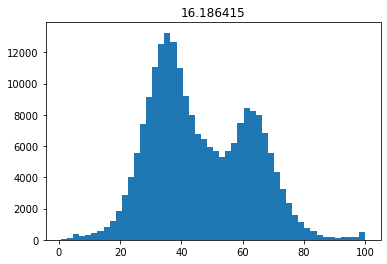

Epoch 180, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2399.23
Epoch 181, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2412.36
Epoch 182, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2425.51
Epoch 183, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2438.71
Epoch 184, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2451.83
Epoch 185, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=2464.97
Epoch 186, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=2478.17
Epoch 187, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2491.34
Epoch 188, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2504.32
Epoch 189, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=2517.52


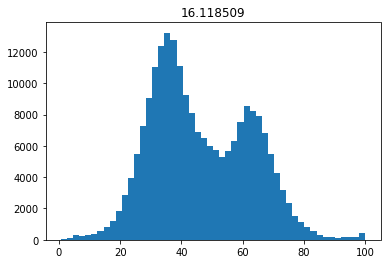

Epoch 190, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2533.95
Epoch 191, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2547.45
Epoch 192, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2560.79
Epoch 193, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=2573.94
Epoch 194, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2587.10
Epoch 195, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2600.22
Epoch 196, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2613.19
Epoch 197, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=2626.22
Epoch 198, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2639.19
Epoch 199, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=2652.35


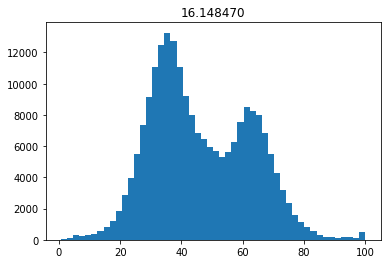

Epoch 200, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=2668.03
Epoch 201, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=2681.17
Epoch 202, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2694.26
Epoch 203, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2707.40
Epoch 204, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2720.55
Epoch 205, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=2733.59
Epoch 206, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=2747.00
Epoch 207, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=2760.38
Epoch 208, train_loss=0.0550, reg=0.0000, test_loss=0.0523, time=2773.52
Epoch 209, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=2786.69


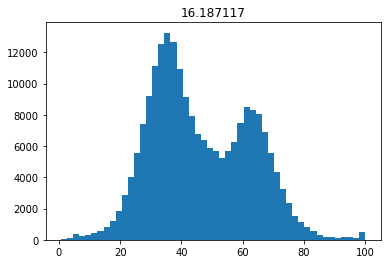

Epoch 210, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=2802.82
Epoch 211, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=2815.91
Epoch 212, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=2829.08
Epoch 213, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=2842.21
Epoch 214, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=2855.27
Epoch 215, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=2868.49
Epoch 216, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=2881.24
Epoch 217, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=2894.54
Epoch 218, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=2907.86
Epoch 219, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=2921.20


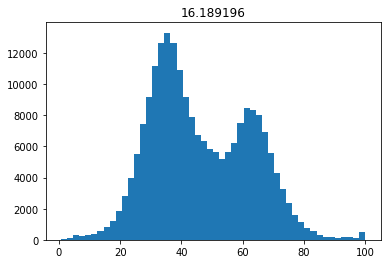

Epoch 220, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=2937.39
Epoch 221, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=2950.58
Epoch 222, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=2963.95
Epoch 223, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=2977.11
Epoch 224, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=2990.42
Epoch 225, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=3003.92
Epoch 226, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3017.46
Epoch 227, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3031.14
Epoch 228, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3044.84
Epoch 229, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3058.52


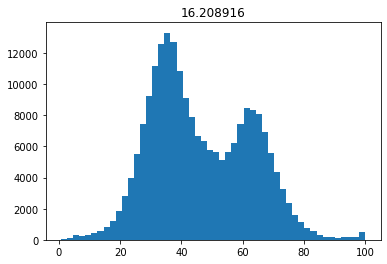

Epoch 230, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=3075.22
Epoch 231, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=3088.21
Epoch 232, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3101.27
Epoch 233, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3114.40
Epoch 234, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3127.50
Epoch 235, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=3140.74
Epoch 236, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3154.00
Epoch 237, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3167.23
Epoch 238, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3180.44
Epoch 239, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3193.56


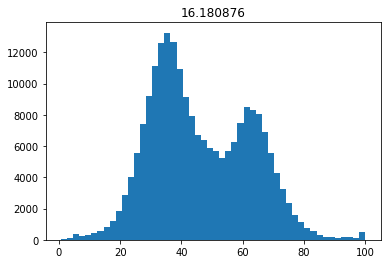

Epoch 240, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3209.70
Epoch 241, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3222.91
Epoch 242, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=3235.74
Epoch 243, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=3248.94
Epoch 244, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=3261.75
Epoch 245, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=3274.49
Epoch 246, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3287.40
Epoch 266, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=3544.38
Epoch 267, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3557.76
Epoch 268, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=3571.18
Epoch 269, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3584.47


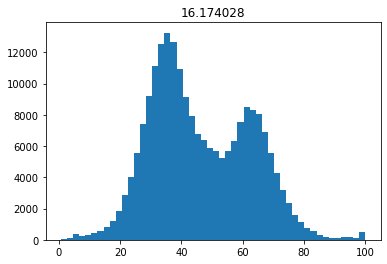

Epoch 270, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3600.91
Epoch 271, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3613.93
Epoch 272, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3627.10
Epoch 273, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=3639.88
Epoch 274, train_loss=0.0549, reg=0.0000, test_loss=0.0522, time=3652.57
Epoch 275, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3665.17
Epoch 276, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3678.10
Epoch 277, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=3691.45
Epoch 278, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3703.59
Epoch 279, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3716.77


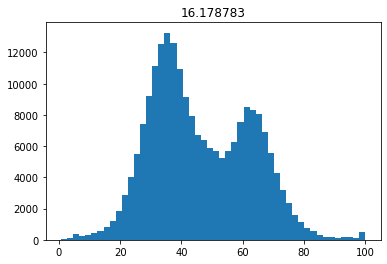

Epoch 280, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3732.91
Epoch 281, train_loss=0.0557, reg=0.0000, test_loss=0.0522, time=3746.07
Epoch 282, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=3759.00
Epoch 283, train_loss=0.0552, reg=0.0000, test_loss=0.0522, time=3772.06
Epoch 284, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3785.08
Epoch 285, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3798.17
Epoch 286, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3811.28
Epoch 287, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3824.42
Epoch 288, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=3837.58
Epoch 289, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=3850.70


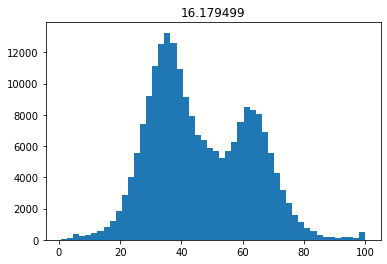

Epoch 290, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3866.78
Epoch 291, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=3879.81
Epoch 292, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=3892.85
Epoch 293, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=3905.44
Epoch 294, train_loss=0.0558, reg=0.0000, test_loss=0.0523, time=3918.53
Epoch 295, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=3931.67
Epoch 296, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3944.39
Epoch 297, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=3957.55
Epoch 298, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=3970.89
Epoch 299, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=3984.18


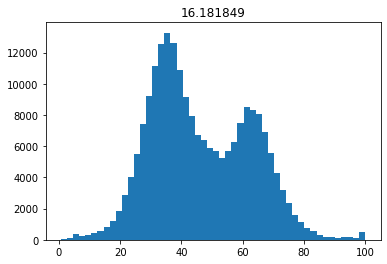

Epoch 300, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=4000.30
Epoch 301, train_loss=0.0551, reg=0.0000, test_loss=0.0523, time=4013.43
Epoch 302, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=4026.58
Epoch 303, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4039.82
Epoch 304, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4052.96
Epoch 305, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4066.14
Epoch 306, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4079.43
Epoch 307, train_loss=0.0555, reg=0.0000, test_loss=0.0522, time=4092.73
Epoch 308, train_loss=0.0553, reg=0.0000, test_loss=0.0522, time=4105.96
Epoch 309, train_loss=0.0551, reg=0.0000, test_loss=0.0522, time=4118.65


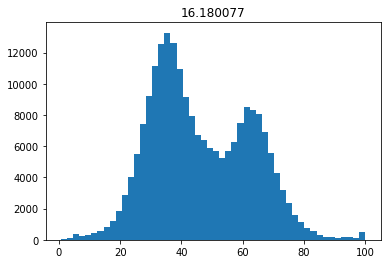

Epoch 310, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4133.96
Epoch 311, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4146.18
Epoch 312, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4158.19
Epoch 313, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=4170.06
Epoch 314, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4182.63
Epoch 315, train_loss=0.0554, reg=0.0000, test_loss=0.0522, time=4195.36
Epoch 316, train_loss=0.0556, reg=0.0000, test_loss=0.0522, time=4207.97
Epoch 317, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4220.67
Epoch 318, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4233.33
Epoch 319, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4245.89


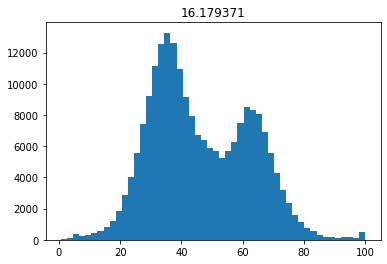

Epoch 320, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4261.33
Epoch 321, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4273.94
Epoch 322, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4286.54
Epoch 323, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4299.20
Epoch 324, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4311.85
Epoch 325, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4324.44
Epoch 326, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=4337.05
Epoch 327, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4349.67
Epoch 328, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4362.27
Epoch 329, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4375.47


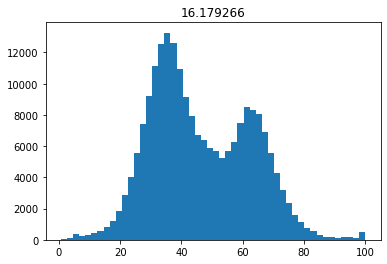

Epoch 330, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4391.46
Epoch 331, train_loss=0.0551, reg=0.0000, test_loss=0.0523, time=4404.57
Epoch 332, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4417.86
Epoch 333, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4431.00
Epoch 334, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4444.12
Epoch 335, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4456.99
Epoch 336, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4470.19
Epoch 337, train_loss=0.0551, reg=0.0000, test_loss=0.0523, time=4483.48
Epoch 338, train_loss=0.0551, reg=0.0000, test_loss=0.0523, time=4496.65
Epoch 339, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4509.93


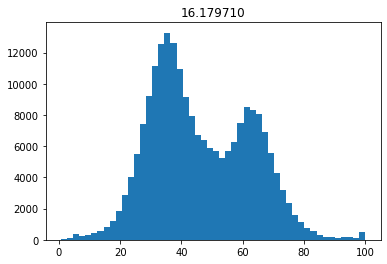

Epoch 340, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4525.97
Epoch 341, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4539.15
Epoch 342, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4552.23
Epoch 343, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4565.33
Epoch 344, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4578.44
Epoch 345, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4591.63
Epoch 346, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4604.78
Epoch 347, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4616.57
Epoch 348, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4629.01
Epoch 349, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4642.08


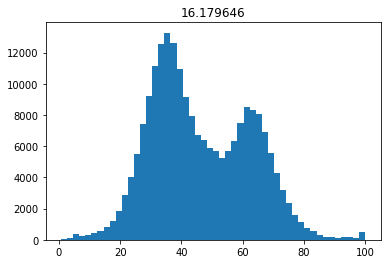

Epoch 350, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4657.18
Epoch 351, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4670.29
Epoch 352, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4683.44
Epoch 353, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4696.44
Epoch 354, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4709.68
Epoch 355, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=4722.80
Epoch 356, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4734.30
Epoch 357, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=4747.24
Epoch 358, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=4760.38
Epoch 359, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4773.16


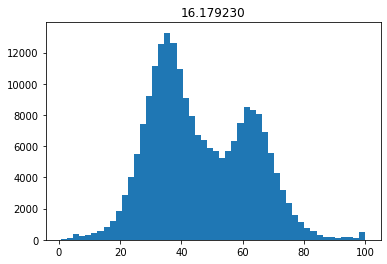

Epoch 360, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4789.25
Epoch 361, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4800.74
Epoch 362, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4805.91
Epoch 363, train_loss=0.0557, reg=0.0000, test_loss=0.0523, time=4813.25
Epoch 364, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4826.38
Epoch 365, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=4839.53
Epoch 366, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4852.66
Epoch 367, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4865.78
Epoch 368, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4878.98
Epoch 369, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4892.10


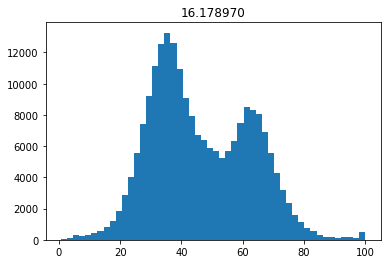

Epoch 370, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4908.14
Epoch 371, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4921.26
Epoch 372, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4934.33
Epoch 373, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=4947.40
Epoch 374, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=4960.49
Epoch 375, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=4973.54
Epoch 376, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=4986.63
Epoch 377, train_loss=0.0552, reg=0.0000, test_loss=0.0523, time=4999.74
Epoch 378, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=5012.85
Epoch 379, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=5025.95


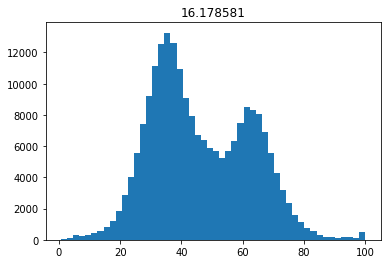

Epoch 380, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=5041.85
Epoch 381, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=5054.99
Epoch 382, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=5068.17
Epoch 383, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=5081.32
Epoch 384, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=5094.48
Epoch 385, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=5107.60
Epoch 386, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=5120.74
Epoch 387, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=5133.93
Epoch 388, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=5146.95
Epoch 389, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=5160.02


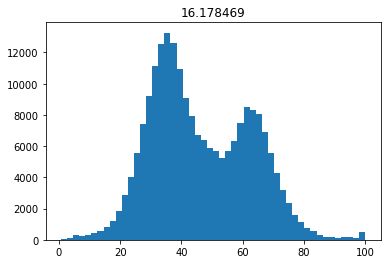

Epoch 390, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=5175.98
Epoch 391, train_loss=0.0556, reg=0.0000, test_loss=0.0523, time=5189.04
Epoch 392, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=5202.06
Epoch 393, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=5215.19
Epoch 394, train_loss=0.0553, reg=0.0000, test_loss=0.0523, time=5228.12
Epoch 395, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=5239.11
Epoch 396, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=5252.46
Epoch 397, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=5262.16
Epoch 398, train_loss=0.0554, reg=0.0000, test_loss=0.0523, time=5275.44
Epoch 399, train_loss=0.0555, reg=0.0000, test_loss=0.0523, time=5288.78


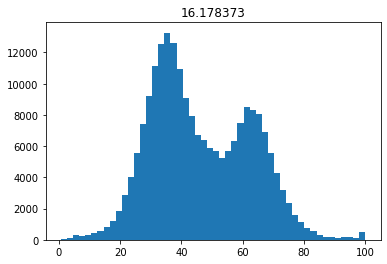

In [21]:
# Code to generate vac_inferred_v3
from torch.nn import functional as F 
import time 

start_time = time.time() 

net = NetworkFC(x_dim=150, num_feat=100).to(device)
optim = torch.optim.Adam(net.parameters(), lr=1e-3) 
scheduler = torch.optim.lr_scheduler.StepLR(optim, step_size=20, gamma=0.5)
for epoch in range(400):
    train_loss_all = 0.0
    test_loss_all = 0.0
    net.train(True)
    for key in train_features:
        optim.zero_grad()
        pred = net(train_features[key])
        loss = (((pred * train_weights[key].view(-1, 1)).sum(dim=0) - train_labels[key]) / 100).pow(2) 
        # Add a penalty if the vaccination rate is greater than 90 since that is unlikely
        reg = (F.relu(pred - 90.) / 10).pow(2).sum() + (F.relu(pred - 95.)).pow(2).sum() 
        loss = loss + reg 
        ""
        loss.backward()
        train_loss_all += (((net(train_features[key]) * train_weights[key].view(-1, 1)).sum(dim=0) - train_labels[key]) / 100).abs().detach()
        optim.step()
        
#         with torch.no_grad():
#             for param in net.parameters():
#                 param.add_(0.1 * torch.randn(param.size(), device=device) * np.sqrt(lr))
    net.train(False) # Keep the randomization so that it's a Bayesian posterior sample
    with torch.no_grad():
        for key in test_features:
            test_loss_all += (((net(test_features[key]) * test_weights[key].view(-1, 1)).sum(dim=0) - test_labels[key]) / 100).abs()
    #test_loss_all = train_loss_all 
    scheduler.step()
    print("Epoch %d, train_loss=%.4f, reg=%.4f, test_loss=%.4f, time=%.2f" % (epoch, train_loss_all / len(train_features), reg, test_loss_all / len(test_features), time.time() - start_time))
    
    if epoch % 10 == 9:
        # Recover all the vaccination rates
        array = []
        with torch.no_grad():
            for key in features:
                adjusted = net(features[key]) / (net(features[key]) * weights[key].view(-1, 1)).sum(dim=0) * labels[key]
                adjusted = adjusted.clamp(min=0, max=100)
                array.append(pd.DataFrame({'census_block_group': cbg[key], 'vac_rate_inferred': adjusted.flatten().cpu().numpy()}))
        result = pd.concat(array)
        plt.hist(result['vac_rate_inferred'].to_numpy(), bins=50)
        plt.title('%f' % result['vac_rate_inferred'].to_numpy().std())
        # plt.savefig('vacc_hist_06-15-2021.png')
        plt.show()
        
        

In [22]:
# Recover all the vaccination rates
array = []
net.train(False)
with torch.no_grad():
    for key in features:
        adjusted = net(features[key]) / (net(features[key]) * weights[key].view(-1, 1)).sum(dim=0) * labels[key]
        adjusted = adjusted.clamp(min=0, max=100)
        array.append(pd.DataFrame({'census_block_group': cbg[key], 'vac_rate_inferred': adjusted.flatten().cpu().numpy()}))
result = pd.concat(array)


In [25]:
result.to_csv('data/vac_inferred_lvm.csv')